In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data

In [2]:
train = pd.read_csv("train.tsv",sep ="\t", index_col ='train_id')
test = pd.read_csv("test.tsv", sep = "\t", index_col ='test_id' )

C:\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:395: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
print("amount of train data = {} | amount of test data = {}" .format(len(train), len(test)))


amount of train data = 1482535 | amount of test data = 693359


In [4]:
train.head()

,name,item_condition_id,category_name,brand_name,price,shipping,item_description
train_id,,,,,,,
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [5]:
test.head()

,name,item_condition_id,category_name,brand_name,shipping,item_description
test_id,,,,,,
0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,NaN,1,Size 7
1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,NaN,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined..."
2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coac...
3,Floral Kimono,2,Women/Sweaters/Cardigan,NaN,0,-floral kimono -never worn -lightweight and pe...
4,Life after Death,3,Other/Books/Religion & Spirituality,NaN,1,Rediscovering life after the loss of a loved o...


In [5]:
# check unique data
train_columns = train.columns
for i in train_columns:
    print("{} = {} unique_data".format(i,len(train[i].unique())))
print(len(train))

name = 1225273 unique_data
item_condition_id = 5 unique_data
category_name = 1288 unique_data
brand_name = 4810 unique_data
price = 828 unique_data
shipping = 2 unique_data
item_description = 1281427 unique_data
1482535


In [6]:
test_columns = test.columns
for i in test_columns:
    print("{} = {} unique_data".format(i,len(test[i].unique())))
print(len(test))

name = 601117 unique_data
item_condition_id = 5 unique_data
category_name = 1224 unique_data
brand_name = 3901 unique_data
shipping = 2 unique_data
item_description = 609555 unique_data
693359


# Missing data

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1482535 entries, 0 to 1482534
Data columns (total 7 columns):
name                 1482535 non-null object
item_condition_id    1482535 non-null int64
category_name        1476208 non-null object
brand_name           849853 non-null object
price                1482535 non-null float64
shipping             1482535 non-null int64
item_description     1482531 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 90.5+ MB


In [8]:
train_columns = train.columns
for i in train_columns:
    print("{0} = {1:.2f}% null_data".format(i,(len(train[train[i].isnull()])/ len(train))*100 ))

name = 0.00% null_data
item_condition_id = 0.00% null_data
category_name = 0.43% null_data
brand_name = 42.68% null_data
price = 0.00% null_data
shipping = 0.00% null_data
item_description = 0.00% null_data


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 693359 entries, 0 to 693358
Data columns (total 6 columns):
name                 693359 non-null object
item_condition_id    693359 non-null int64
category_name        690301 non-null object
brand_name           397834 non-null object
shipping             693359 non-null int64
item_description     693359 non-null object
dtypes: int64(2), object(4)
memory usage: 37.0+ MB


In [10]:
test_columns = test.columns
for i in test_columns:
    print("{0} = {1:.2f}% null_data".format(i,(len(test[test[i].isnull()])/ len(test))*100 ))

name = 0.00% null_data
item_condition_id = 0.00% null_data
category_name = 0.44% null_data
brand_name = 42.62% null_data
shipping = 0.00% null_data
item_description = 0.00% null_data


# Explore Train Data

In [11]:
train.head(10)

,name,item_condition_id,category_name,brand_name,price,shipping,item_description
train_id,,,,,,,
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity
5,Bundled items requested for Ruie,3,Women/Other/Other,NaN,59.0,0,"Banana republic bottoms, Candies skirt with ma..."
6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...
7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,Soffe,6.0,1,You get three pairs of Sophie cheer shorts siz...
8,Girls Nike Pro shorts,3,Sports & Outdoors/Apparel/Girls,Nike,19.0,0,Girls Size small Plus green. Three shorts total.


In [4]:
train.loc[train["brand_name"].isnull(),"brand_name"] ="No_Brand"

In [5]:
test.loc[test["brand_name"].isnull(),"brand_name"] ="No_Brand"

In [6]:
x_train = train.drop("price", axis =1)
y_train = train["price"]

In [7]:
train.describe().astype("float16")

,item_condition_id,price,shipping
count,inf,inf,inf
mean,1.907227,26.734375,0.447266
std,0.903320,38.593750,0.497314
min,1.000000,0.000000,0.000000
25%,1.000000,10.000000,0.000000
50%,2.000000,17.000000,0.000000
75%,3.000000,29.000000,1.000000
max,5.000000,2009.000000,1.000000


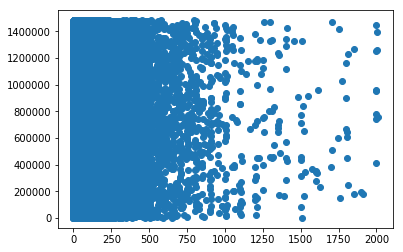

In [8]:
#outlier 존재
plt.scatter(train["price"].values,train["price"].index)

# Analyize relationship between item condition and price

In [17]:
grouped2 = train.groupby("item_condition_id")["price"].aggregate({"count_of_price":'count'}).reset_index()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


In [18]:
grouped2

,item_condition_id,count_of_price
0,1,640549
1,2,375479
2,3,432161
3,4,31962
4,5,2384


In [19]:
count_price = grouped2["count_of_price"]

In [20]:
grouped = train.groupby("item_condition_id")["price"].aggregate({"sum_of_price":'sum'}).reset_index()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


In [21]:
grouped["standard_of_price"] = grouped["sum_of_price"] / count_price

In [22]:
grouped

,item_condition_id,sum_of_price,standard_of_price
0,1,16966200.0,26.486967
1,2,10349412.0,27.563225
2,3,11469860.0,26.540711
3,4,778249.5,24.349212
4,5,75582.0,31.703859


In [23]:
grouped["count_of_price"] = count_price

In [24]:
grouped

,item_condition_id,sum_of_price,standard_of_price,count_of_price
0,1,16966200.0,26.486967,640549
1,2,10349412.0,27.563225,375479
2,3,11469860.0,26.540711,432161
3,4,778249.5,24.349212,31962
4,5,75582.0,31.703859,2384


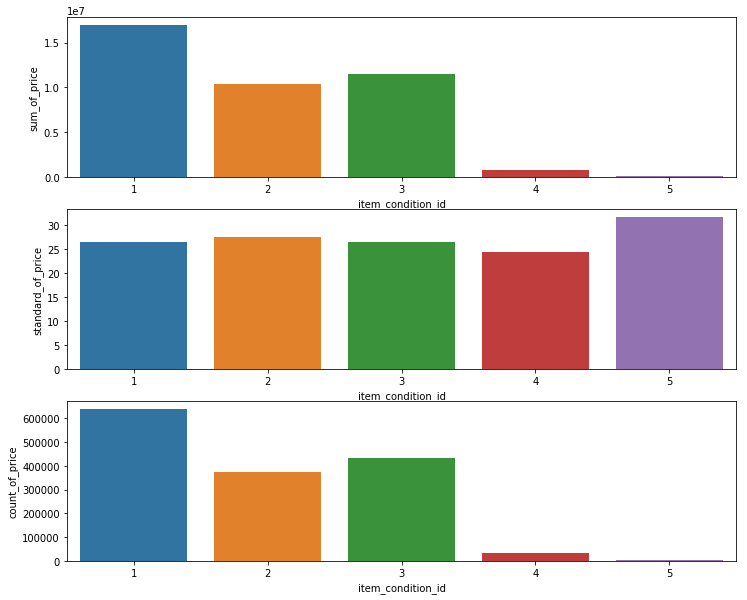

In [25]:
figure, (axe1,axe2,axe3) =plt.subplots(nrows =3, ncols =1)
figure.set_size_inches(12,10)
sns.barplot(grouped["item_condition_id"], grouped["sum_of_price"], ax = axe1)
sns.barplot(grouped["item_condition_id"], grouped["standard_of_price"], ax = axe2)
sns.barplot(grouped["item_condition_id"], grouped["count_of_price"], ax = axe3)



# Analyize relationship between brand Name and price

In [26]:
grouped = train.groupby("brand_name")["price"].aggregate({"sum_of_price":"sum"}).reset_index()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


In [27]:
x = train.groupby("brand_name")["price"].aggregate({"count_of_brand":"count"}).reset_index()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


In [28]:
grouped["count_of_brand"] = x["count_of_brand"]

### Top 10 Sales

In [29]:
top_10_sales = grouped.sort_values("sum_of_price",ascending=False).head(10)

In [30]:
top_10_sales

,brand_name,sum_of_price,count_of_brand
3075,No_Brand,13370755.5,632682
3057,Nike,1662377.0,54043
3222,PINK,1424749.0,54088
267,Apple,1269159.0,17322
4505,Victoria's Secret,1115121.5,48036
2604,LuLaRoe,1044515.0,31024
2841,Michael Kors,867084.5,13928
2626,Lululemon,685634.0,14558
2593,Louis Vuitton,644372.0,3187
3067,Nintendo,520332.0,15007


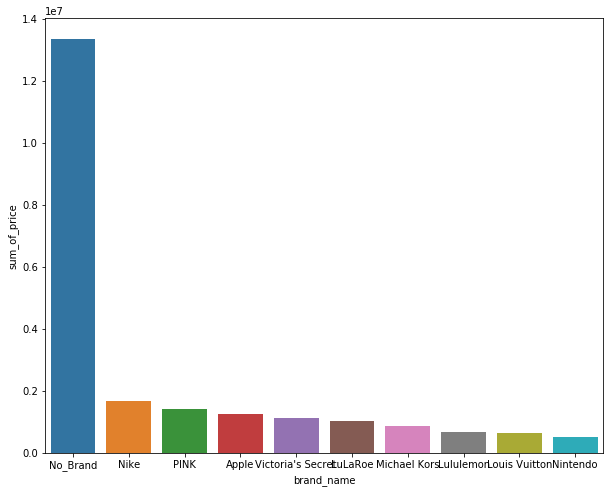

In [31]:
figure, axe = plt.subplots(nrows =1, ncols =1)
figure.set_size_inches(10,8)
sns.barplot(top_10_sales["brand_name"], top_10_sales["sum_of_price"])

### Top 10 volume of Brand

In [32]:
top_10_volume_sales = grouped.sort_values("count_of_brand",ascending=False).head(10)

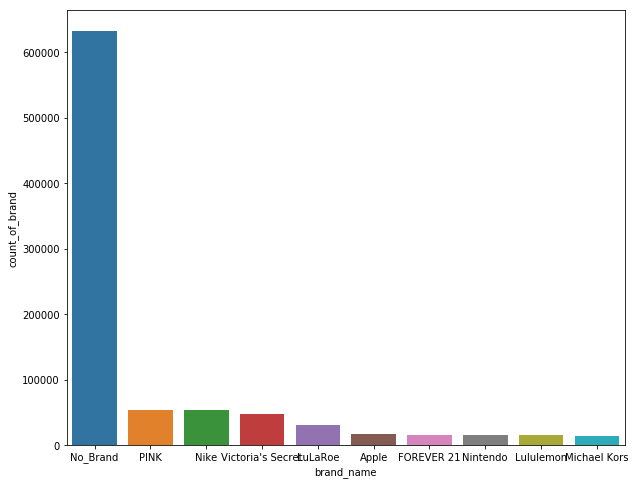

In [33]:
figure, axe = plt.subplots(nrows =1, ncols =1)
figure.set_size_inches(10,8)
sns.barplot(top_10_volume_sales["brand_name"], top_10_volume_sales["count_of_brand"])

In [34]:
grouped["standard_of_price"] = grouped["sum_of_price"] / grouped["count_of_brand"]

In [35]:
brand_std = grouped.sort_values("standard_of_price",ascending=False)

In [36]:
Top_20_brand_price = brand_std.head(20)

In [37]:
Top_20_brand_price.head()

,brand_name,sum_of_price,count_of_brand,standard_of_price
1222,Demdaco,858.0,2,429.000000
3466,Proenza Schouler,1653.0,4,413.250000
346,Auto Meter,344.0,1,344.000000
3188,Oris,300.0,1,300.000000
2656,MCM Worldwide,19953.0,69,289.173913


### Top 20 High-end brand

In [38]:
Top_20_brand_price

,brand_name,sum_of_price,count_of_brand,standard_of_price
1222,Demdaco,858.0,2,429.000000
3466,Proenza Schouler,1653.0,4,413.250000
346,Auto Meter,344.0,1,344.000000
3188,Oris,300.0,1,300.000000
2656,MCM Worldwide,19953.0,69,289.173913
2582,Longines,254.0,1,254.000000
4529,Vitamix,2278.0,9,253.111111
598,Blendtec,1259.0,5,251.800000
1198,David Yurman,60164.0,242,248.611570
881,Celine,17431.0,73,238.780822


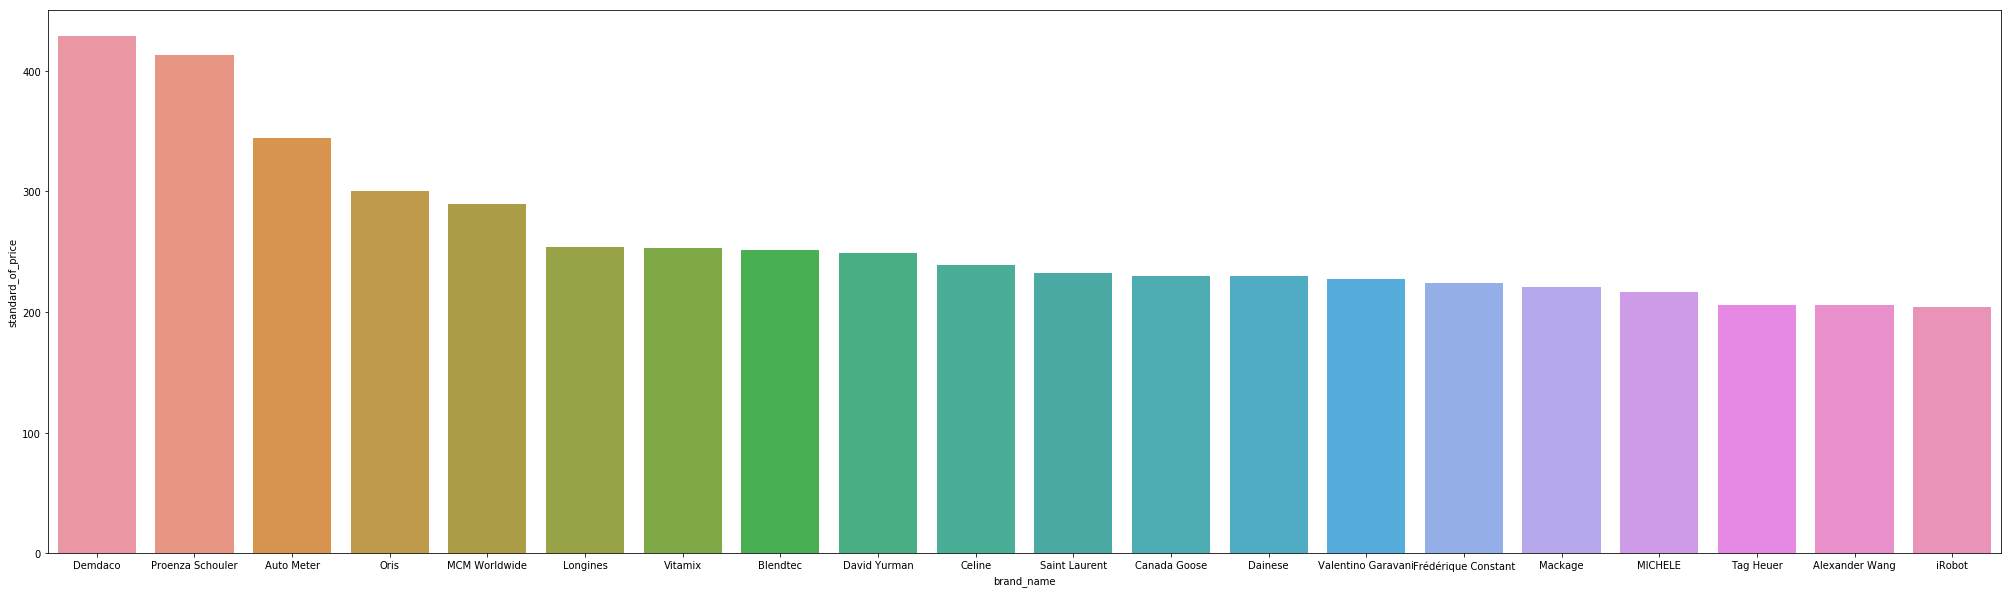

In [39]:
figure, axe = plt.subplots(nrows =1, ncols =1)
figure.set_size_inches(35,10)
sns.barplot(Top_20_brand_price["brand_name"], Top_20_brand_price["standard_of_price"])

# Analyize between product_name and price

In [40]:
# grouped = 
grouped = train.groupby("name")["price"].aggregate({"sum_of_price":"sum"}).reset_index()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


In [41]:
grouped.head()

,name,sum_of_price
0,! 3 girls t shirts,10.0
1,! 4 old baseball cards,17.0
2,! ALPINESTAR MEN'S TEE SHIRT!,15.0
3,! HOLD ! Distressed Jeans/ Shorts Bundle,75.0
4,! Junior's Plaid tie front top,9.0


In [42]:
grouped["amount_of_product"]= train.groupby("name")["price"].aggregate({"amount_of_product":"count"}).values

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


In [43]:
grouped["mean_price"] = grouped["sum_of_price"] / grouped["amount_of_product"]

### Top 10 amount of product

In [44]:
Top_amount_of_product = grouped.sort_values("amount_of_product",ascending=False).head(10)

In [45]:
Top_amount_of_product

,name,sum_of_price,amount_of_product,mean_price
232963,Bundle,77013.0,2232,34.504032
911677,Reserved,13425.0,453,29.635762
295043,Converse,9960.0,445,22.382022
151699,BUNDLE,14933.0,418,35.724880
336927,Dress,6247.0,410,15.236585
288052,Coach purse,15358.0,404,38.014851
616117,Lularoe TC leggings,9792.0,396,24.727273
922280,Romper,5000.0,353,14.164306
776279,Nike,8810.0,340,25.911765
1092170,Vans,7988.0,334,23.916168


#### *Bundle 과 BUNDLE은 다른 것인가?

In [46]:
train[train["name"]=="BUNDLE"]

,name,item_condition_id,category_name,brand_name,price,shipping,item_description
train_id,,,,,,,
3848,BUNDLE,1,"Women/Dresses/Above Knee, Mini",FOREVER 21,18.0,0,Forever 21 Sequin Dress Fleurish Dress Almost ...
10855,BUNDLE,1,Women/Underwear/Panties,No_Brand,10.0,0,Control Top Boy Shorts NWT Roxy Shorts Size 7
19417,BUNDLE,2,Women/Athletic Apparel/Shirts & Tops,No_Brand,17.0,0,On hold
19503,BUNDLE,1,Women/Jeans/Leggings,PINK,38.0,0,New VS PINK LEGGINGS Blue caged blouse
22161,BUNDLE,3,Women/Shoes/Flats,No_Brand,12.0,0,Black Size 6.5 Flats Set of 3 MineCraft Books
22488,BUNDLE,2,Women/Dresses/Other,No_Brand,80.0,1,"This bundle includes: 1. ""Let Loose"" Flared Ju..."
31709,BUNDLE,2,Women/Jeans/Boot Cut,Miss Me,42.0,0,No description yet
35439,BUNDLE,3,"Women/Dresses/Above Knee, Mini",FOREVER 21,21.0,0,No description yet
41391,BUNDLE,3,Women/Jeans/Boot Cut,Hollister,42.0,0,A&F Pink Stripe Top Girls 4 Pieces size 5/6 2 ...


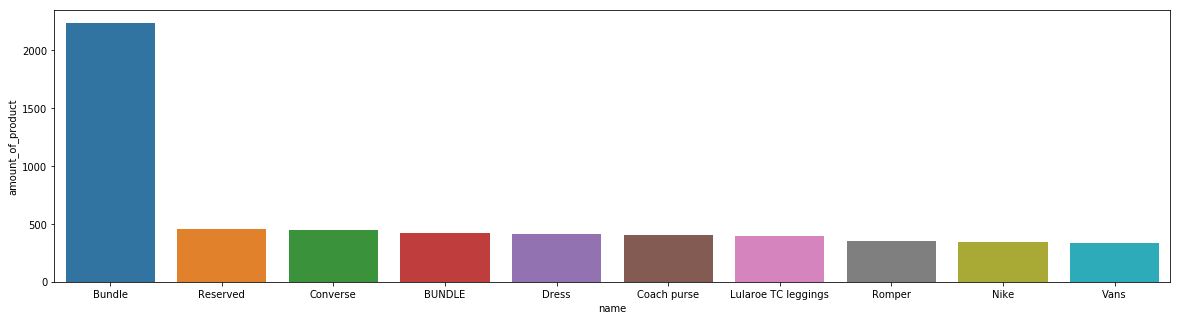

In [47]:
figure, axe = plt.subplots(nrows =1, ncols =1)
figure.set_size_inches(20,5)
sns.barplot(Top_amount_of_product["name"], Top_amount_of_product["amount_of_product"])

### Top 10 sales of product

In [48]:
Top_sales_of_product = grouped.sort_values("sum_of_price",ascending=False).head(10)

In [49]:
Top_sales_of_product

,name,sum_of_price,amount_of_product,mean_price
232963,Bundle,77013.0,2232,34.504032
1195353,iPhone 6,26418.0,181,145.955801
587449,Louis Vuitton,16677.0,104,160.355769
679470,Michael Kors Purse,16116.0,243,66.320988
1195845,iPhone 6 Plus,15701.0,86,182.569767
288052,Coach purse,15358.0,404,38.014851
126552,Apple Watch,15022.0,83,180.987952
151699,BUNDLE,14933.0,418,35.724880
1198719,iPhone 6s,13918.0,76,183.131579
911677,Reserved,13425.0,453,29.635762


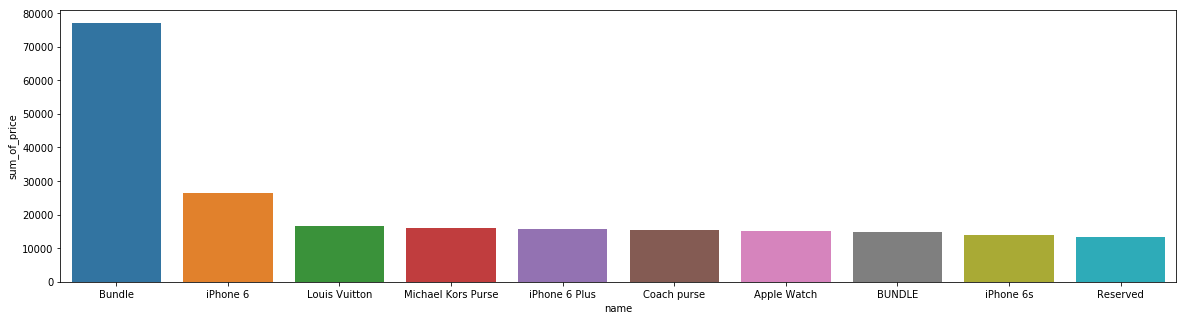

In [50]:
figure, axe = plt.subplots(nrows =1, ncols =1)
figure.set_size_inches(20,5)
sns.barplot(Top_sales_of_product["name"], Top_sales_of_product["sum_of_price"])

### Top mean_of_price

In [51]:
Top_mean_price = grouped.sort_values("mean_price",ascending=False).head(30)

In [52]:
Top_mean_price

,name,sum_of_price,amount_of_product,mean_price
706440,NEW Chanel WOC Caviar Gold Hardware,2009.0,1,2009.0
714071,NEW-Chanel Boy Wallet o Chain WOC Caviar,2006.0,1,2006.0
316772,David Yurman Wheaton ring,2004.0,1,2004.0
270634,Chanel Classic Jumbo Single flap bag,2000.0,1,2000.0
270631,Chanel Chevron Fuschia Pink 2,2000.0,1,2000.0
270520,Chanel Black wallet on chain,2000.0,1,2000.0
1131577,Vs2/I 1ct Diamond Engagement Ring,2000.0,1,2000.0
217860,Brand New Chanel CC Quilted WOC,2000.0,1,2000.0
270790,Chanel J12 H0682 Wrist Watch for Women,1999.0,1,1999.0
712534,NEW apple products,1909.0,1,1909.0


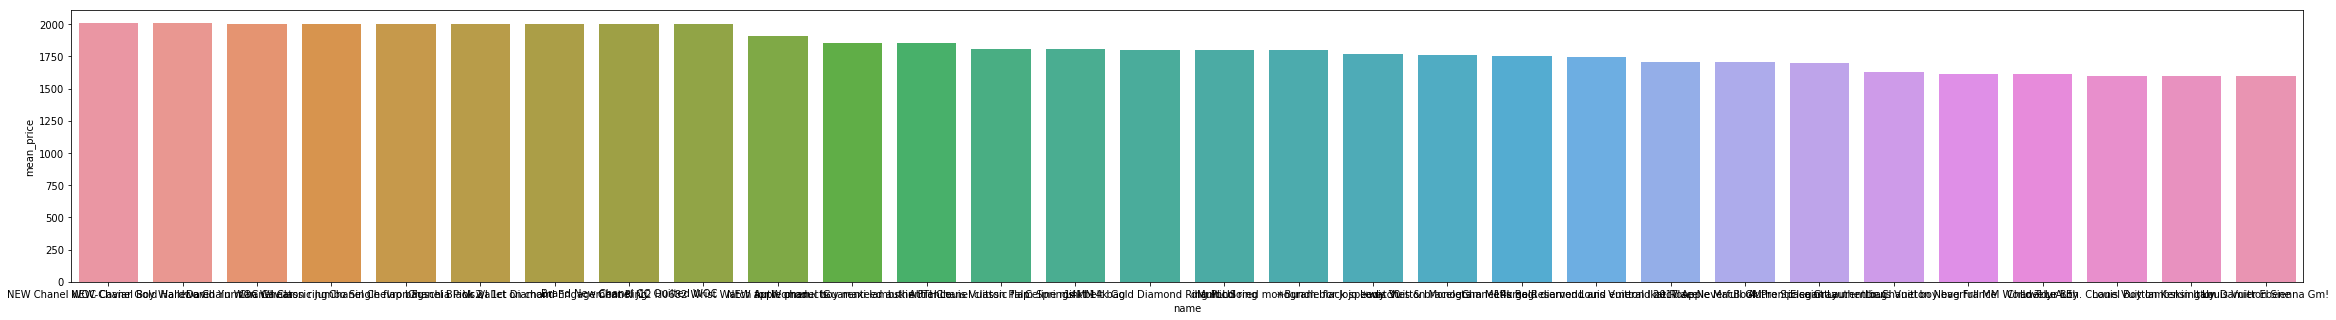

In [53]:
figure, axe = plt.subplots(nrows =1, ncols =1)
figure.set_size_inches(40,5)
sns.barplot(Top_mean_price["name"], Top_mean_price["mean_price"])

### condition : 1~ 5, 적을수록 좋은것 

# Analyize between category and price

In [54]:
train.head()

,name,item_condition_id,category_name,brand_name,price,shipping,item_description
train_id,,,,,,,
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,No_Brand,10.0,1,No description yet
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,No_Brand,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,No_Brand,44.0,0,Complete with certificate of authenticity


In [55]:
grouped = train.groupby("category_name")["price"].aggregate({"sum_of_price":"sum"}).reset_index()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


In [56]:
grouped.head()

,category_name,sum_of_price
0,Beauty/Bath & Body/Bath,93315.0
1,Beauty/Bath & Body/Bathing Accessories,7265.0
2,Beauty/Bath & Body/Cleansers,9807.0
3,Beauty/Bath & Body/Other,3009.0
4,Beauty/Bath & Body/Scrubs & Body Treatments,20008.0


In [57]:
grouped["amount_of_category"] = train.groupby("category_name").size().values

In [58]:
grouped.head()

,category_name,sum_of_price,amount_of_category
0,Beauty/Bath & Body/Bath,93315.0,5049
1,Beauty/Bath & Body/Bathing Accessories,7265.0,332
2,Beauty/Bath & Body/Cleansers,9807.0,723
3,Beauty/Bath & Body/Other,3009.0,147
4,Beauty/Bath & Body/Scrubs & Body Treatments,20008.0,812


In [59]:
grouped["standard_price"] = grouped["sum_of_price"] / grouped["amount_of_category"].astype("float16")

In [60]:
grouped.head()

,category_name,sum_of_price,amount_of_category,standard_price
0,Beauty/Bath & Body/Bath,93315.0,5049,18.485539
1,Beauty/Bath & Body/Bathing Accessories,7265.0,332,21.882530
2,Beauty/Bath & Body/Cleansers,9807.0,723,13.564315
3,Beauty/Bath & Body/Other,3009.0,147,20.469388
4,Beauty/Bath & Body/Scrubs & Body Treatments,20008.0,812,24.640394


### Top 10 sales_category

In [61]:
Top10_sales= grouped.sort_values("sum_of_price",ascending=False).head(10)

In [62]:
Top10_sales

,category_name,sum_of_price,amount_of_category,standard_price
1137,"Women/Athletic Apparel/Pants, Tights, Leggings",2069651.5,60177,34.384162
1285,Women/Women's Handbags/Shoulder Bag,1011273.0,15328,65.975535
81,Electronics/Cell Phones & Accessories/Cell Pho...,949034.5,8698,109.134602
760,Men/Shoes/Athletic,948463.0,14257,66.530794
1260,Women/Tops & Blouses/T-Shirts,899128.5,46380,19.391143
1204,Women/Shoes/Boots,804473.0,18864,42.645939
112,Electronics/Video Games & Consoles/Games,640546.0,26557,24.116943
27,Beauty/Makeup/Face,634198.0,34335,18.470352
1203,Women/Shoes/Athletic,556209.0,12662,43.920483
28,Beauty/Makeup/Lips,553958.5,29910,18.524562


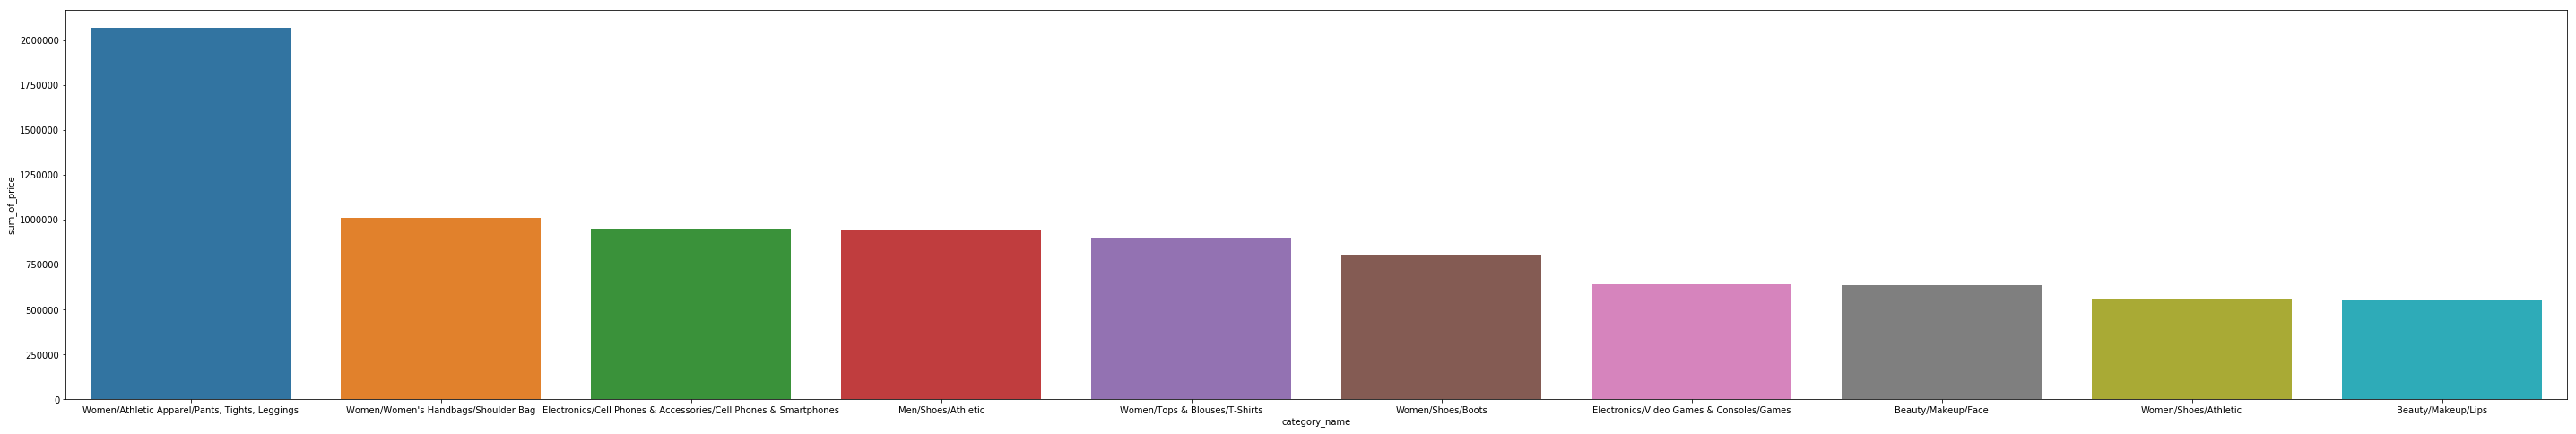

In [63]:
figure, axe = plt.subplots(nrows =1, ncols =1)
figure.set_size_inches(50,8)
sns.barplot(Top10_sales["category_name"],Top10_sales["sum_of_price"])

### Top 10 amount_of_sales

In [64]:
Top10_amount_category= grouped.sort_values("amount_of_category",ascending=False).head(10)

In [65]:
Top10_amount_category

,category_name,sum_of_price,amount_of_category,standard_price
1137,"Women/Athletic Apparel/Pants, Tights, Leggings",2069651.5,60177,34.384162
1260,Women/Tops & Blouses/T-Shirts,899128.5,46380,19.391143
27,Beauty/Makeup/Face,634198.0,34335,18.470352
28,Beauty/Makeup/Lips,553958.5,29910,18.524562
112,Electronics/Video Games & Consoles/Games,640546.0,26557,24.116943
26,Beauty/Makeup/Eyes,368692.0,25215,14.621352
79,"Electronics/Cell Phones & Accessories/Cases, C...",325090.5,24676,13.176496
1265,Women/Underwear/Bras,396470.0,21274,18.631109
1261,"Women/Tops & Blouses/Tank, Cami",292326.0,20284,14.408813
1254,Women/Tops & Blouses/Blouse,317649.5,20284,15.657014


In [66]:
sample  = train[(train["category_name"] == "Women/Athletic Apparel/Pants, Tights, Leggings") &(train["brand_name"] == "LuLaRoe")
      &(train["item_condition_id"]==1)&(train["shipping"]==1)]

In [67]:
sample.sort_values("price", ascending=False)

,name,item_condition_id,category_name,brand_name,price,shipping,item_description
train_id,,,,,,,
1261604,Lularoe Carly with French Bulldogs,1,"Women/Athletic Apparel/Pants, Tights, Leggings",LuLaRoe,350.0,1,BNWT XS Carly dark grey combo with Lularoe BNW...
745497,LuLaRoe TC Leggings (for courtwwu),1,"Women/Athletic Apparel/Pants, Tights, Leggings",LuLaRoe,330.0,1,BUYER IS PURCHASING 9 PAIRS OF LULAROE TALL & ...
184728,Lularoe 6 outfit MEGA BUNDLE DEAL!!,1,"Women/Athletic Apparel/Pants, Tights, Leggings",LuLaRoe,305.0,1,OS Roses with Small Irma OS Roses with Small L...
421274,Lularoe TC Beauty & The Beast Set,1,"Women/Athletic Apparel/Pants, Tights, Leggings",LuLaRoe,225.0,1,Three pairs of beautiful BNWT TC Lularoe leggi...
742855,Lot Of 6 OS Bambi Leggings,1,"Women/Athletic Apparel/Pants, Tights, Leggings",LuLaRoe,210.0,1,Listing for mljl2girls
746962,Beauty and the Beast Disney Roses TC lot,1,"Women/Athletic Apparel/Pants, Tights, Leggings",LuLaRoe,175.0,1,Please read! This listing is for 2 pairs of le...
970344,Lularoe Bundle 3 outfits stripes!,1,"Women/Athletic Apparel/Pants, Tights, Leggings",LuLaRoe,175.0,1,OS Bicycles Mega Unicorn BRAND NEW PRINT/Color...
9720,RESERVED BJoyFuL11 .*-},1,"Women/Athletic Apparel/Pants, Tights, Leggings",LuLaRoe,175.0,1,OS Lularoe Floral Leggings (5 pairs) All Brand...
998815,Bundle,1,"Women/Athletic Apparel/Pants, Tights, Leggings",LuLaRoe,173.0,1,5 pairs of leggings


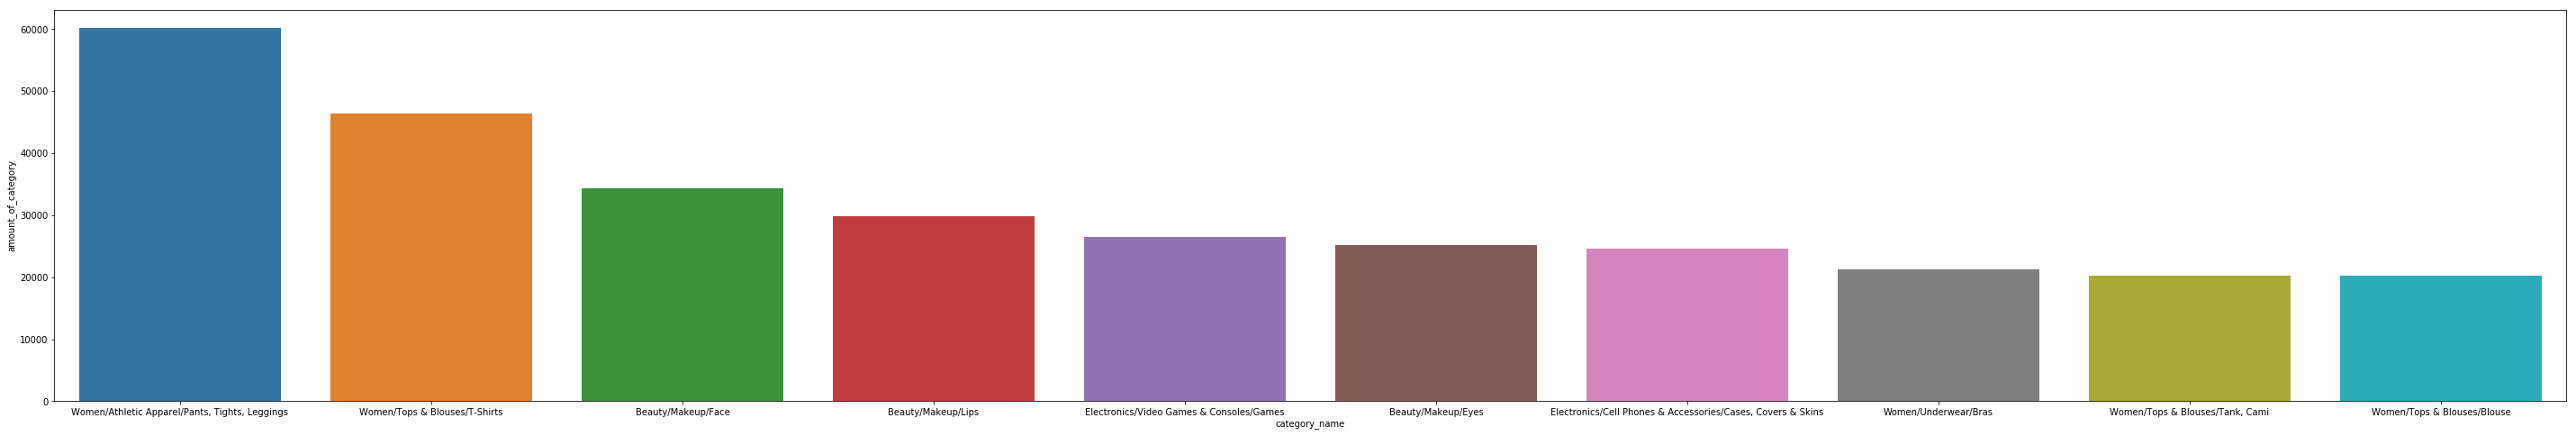

In [68]:
figure, axe = plt.subplots(nrows =1, ncols =1)
figure.set_size_inches(50,8)
sns.barplot(Top10_amount_category["category_name"],Top10_amount_category["amount_of_category"])

### Top 10 mean_of_price

In [69]:
Top10_mean_price= grouped.sort_values("standard_price",ascending=False).head(10)

In [70]:
Top10_mean_price

,category_name,sum_of_price,amount_of_category,standard_price
963,Vintage & Collectibles/Antique/Furniture,195.0,1,195.000000
153,Handmade/Bags and Purses/Clutch,1622.0,9,180.222222
89,Electronics/Computers & Tablets/Laptops & Netb...,315750.0,1783,177.089176
681,Kids/Strollers/Standard,2455.0,15,163.666667
87,Electronics/Computers & Tablets/Desktops & All...,25386.0,170,149.329412
977,Vintage & Collectibles/Bags and Purses/Handbag,190782.0,1367,139.562546
682,Kids/Strollers/Travel Systems,11214.0,90,124.600000
458,Home/Home Appliances/Air Conditioners,5088.0,42,121.142857
678,Kids/Strollers/Lightweight,2108.0,18,117.111111
61,Electronics/Cameras & Photography/Digital Cameras,151163.0,1346,112.305349


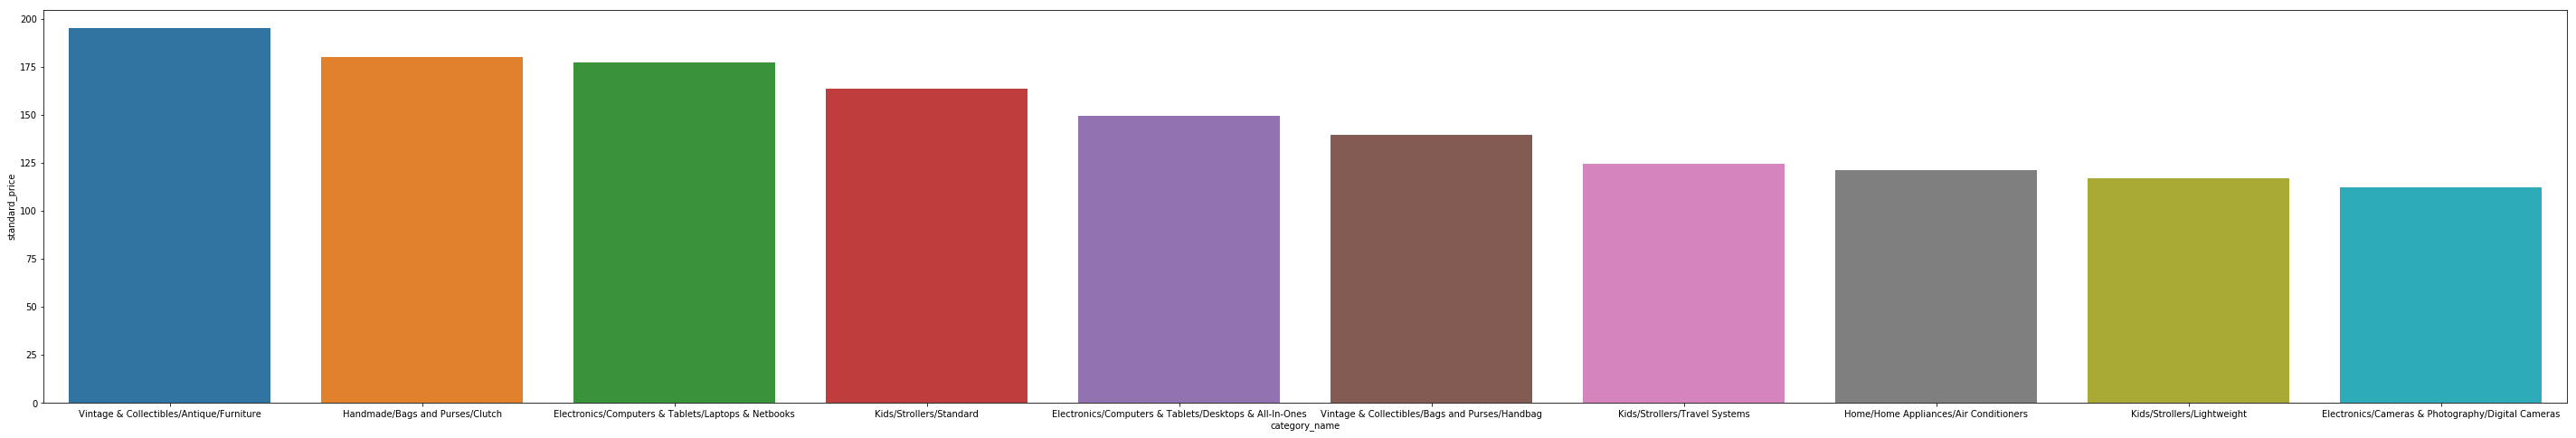

In [71]:
figure, axe = plt.subplots(nrows =1, ncols =1)
figure.set_size_inches(50,8)
sns.barplot(Top10_mean_price["category_name"],Top10_mean_price["standard_price"])

In [72]:
train["category_name"] ="Home/Home Appliances/Air Conditioners"

In [73]:
train.head()

,name,item_condition_id,category_name,brand_name,price,shipping,item_description
train_id,,,,,,,
0,MLB Cincinnati Reds T Shirt Size XL,3,Home/Home Appliances/Air Conditioners,No_Brand,10.0,1,No description yet
1,Razer BlackWidow Chroma Keyboard,3,Home/Home Appliances/Air Conditioners,Razer,52.0,0,This keyboard is in great condition and works ...
2,AVA-VIV Blouse,1,Home/Home Appliances/Air Conditioners,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,Leather Horse Statues,1,Home/Home Appliances/Air Conditioners,No_Brand,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,24K GOLD plated rose,1,Home/Home Appliances/Air Conditioners,No_Brand,44.0,0,Complete with certificate of authenticity


In [74]:
train.loc[train["category_name"].isnull(),"category_name"] ="No_category"

In [75]:
test.loc[test["category_name"].isnull(),"category_name"] ="No_category"

In [76]:
train[train["category_name"] =='Home/Home Appliances/Air Conditioners']

,name,item_condition_id,category_name,brand_name,price,shipping,item_description
train_id,,,,,,,
0,MLB Cincinnati Reds T Shirt Size XL,3,Home/Home Appliances/Air Conditioners,No_Brand,10.0,1,No description yet
1,Razer BlackWidow Chroma Keyboard,3,Home/Home Appliances/Air Conditioners,Razer,52.0,0,This keyboard is in great condition and works ...
2,AVA-VIV Blouse,1,Home/Home Appliances/Air Conditioners,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,Leather Horse Statues,1,Home/Home Appliances/Air Conditioners,No_Brand,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,24K GOLD plated rose,1,Home/Home Appliances/Air Conditioners,No_Brand,44.0,0,Complete with certificate of authenticity
5,Bundled items requested for Ruie,3,Home/Home Appliances/Air Conditioners,No_Brand,59.0,0,"Banana republic bottoms, Candies skirt with ma..."
6,Acacia pacific tides santorini top,3,Home/Home Appliances/Air Conditioners,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...
7,Girls cheer and tumbling bundle of 7,3,Home/Home Appliances/Air Conditioners,Soffe,6.0,1,You get three pairs of Sophie cheer shorts siz...
8,Girls Nike Pro shorts,3,Home/Home Appliances/Air Conditioners,Nike,19.0,0,Girls Size small Plus green. Three shorts total.


# Analyize between Shipping and price

In [77]:
train.head()

,name,item_condition_id,category_name,brand_name,price,shipping,item_description
train_id,,,,,,,
0,MLB Cincinnati Reds T Shirt Size XL,3,Home/Home Appliances/Air Conditioners,No_Brand,10.0,1,No description yet
1,Razer BlackWidow Chroma Keyboard,3,Home/Home Appliances/Air Conditioners,Razer,52.0,0,This keyboard is in great condition and works ...
2,AVA-VIV Blouse,1,Home/Home Appliances/Air Conditioners,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,Leather Horse Statues,1,Home/Home Appliances/Air Conditioners,No_Brand,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,24K GOLD plated rose,1,Home/Home Appliances/Air Conditioners,No_Brand,44.0,0,Complete with certificate of authenticity


In [78]:
grouped = train.groupby("shipping")["price"].aggregate({"sum_of_price":"sum"}).reset_index()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


In [79]:
x = train.groupby("shipping")["price"].aggregate({"amount_of_price":"count"}).reset_index()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


In [80]:
grouped["amount_of_price"] = x["amount_of_price"]

In [81]:
grouped["mean_of_price"] = grouped["sum_of_price"] / grouped["amount_of_price"]

In [82]:
grouped

,shipping,sum_of_price,amount_of_price,mean_of_price
0,0,24674644.5,819435,30.111778
1,1,14964659.0,663100,22.567726


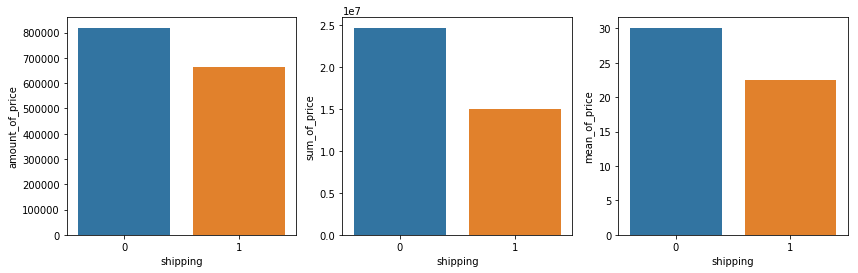

In [83]:
figure, (axe1,axe2,axe3) = plt.subplots(nrows =1, ncols =3)
figure.set_size_inches(14,4)
sns.barplot(grouped["shipping"],grouped["amount_of_price"],ax = axe1)
sns.barplot(grouped["shipping"],grouped["sum_of_price"], ax = axe2)
sns.barplot(grouped["shipping"],grouped["mean_of_price"],ax = axe3)

In [84]:
train.head()

,name,item_condition_id,category_name,brand_name,price,shipping,item_description
train_id,,,,,,,
0,MLB Cincinnati Reds T Shirt Size XL,3,Home/Home Appliances/Air Conditioners,No_Brand,10.0,1,No description yet
1,Razer BlackWidow Chroma Keyboard,3,Home/Home Appliances/Air Conditioners,Razer,52.0,0,This keyboard is in great condition and works ...
2,AVA-VIV Blouse,1,Home/Home Appliances/Air Conditioners,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,Leather Horse Statues,1,Home/Home Appliances/Air Conditioners,No_Brand,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,24K GOLD plated rose,1,Home/Home Appliances/Air Conditioners,No_Brand,44.0,0,Complete with certificate of authenticity


In [85]:
train.shape

(1482535, 7)

In [86]:
len(train["name"].unique())

1225273

# Deal with product name with NLP skill

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features= 100)
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=100, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [11]:
vectorizer.fit(train["name"])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=100, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [13]:
sample =vectorizer.transform(train["name"])


In [14]:
sample

<1482535x100 sparse matrix of type '<class 'numpy.int64'>'
	with 2163152 stored elements in Compressed Sparse Row format>

In [15]:
vocabulary = vectorizer.get_feature_names()

In [16]:
x = pd.DataFrame(sample.toarray(), columns=vocabulary)

In [17]:
train.head()

,name,item_condition_id,category_name,brand_name,price,shipping,item_description
train_id,,,,,,,
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,No_Brand,10.0,1,No description yet
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,No_Brand,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,No_Brand,44.0,0,Complete with certificate of authenticity


In [32]:
train

,name,item_condition_id,category_name,brand_name,price,shipping,item_description
train_id,,,,,,,
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,No_Brand,10.0,1,No description yet
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,No_Brand,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,No_Brand,44.0,0,Complete with certificate of authenticity
5,Bundled items requested for Ruie,3,Women/Other/Other,No_Brand,59.0,0,"Banana republic bottoms, Candies skirt with ma..."
6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...
7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,Soffe,6.0,1,You get three pairs of Sophie cheer shorts siz...
8,Girls Nike Pro shorts,3,Sports & Outdoors/Apparel/Girls,Nike,19.0,0,Girls Size small Plus green. Three shorts total.


In [31]:
train_conbined = pd.concat([train,x],axis =1)

,name,item_condition_id,category_name,brand_name,price,shipping,item_description
train_id,,,,,,,
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,No_Brand,10.0,1,No description yet
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,No_Brand,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,No_Brand,44.0,0,Complete with certificate of authenticity
5,Bundled items requested for Ruie,3,Women/Other/Other,No_Brand,59.0,0,"Banana republic bottoms, Candies skirt with ma..."
6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...
7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,Soffe,6.0,1,You get three pairs of Sophie cheer shorts siz...
8,Girls Nike Pro shorts,3,Sports & Outdoors/Apparel/Girls,Nike,19.0,0,Girls Size small Plus green. Three shorts total.


In [95]:
len(train["brand_name"].unique())

4810

In [96]:
x.columns

Index(['10', '12', '6s', 'adidas', 'air', 'american', 'and', 'baby', 'bag',
       'black', 'blue', 'body', 'boots', 'boys', 'bra', 'bracelet', 'brand',
       'bundle', 'case', 'coach', 'disney', 'dress', 'dunn', 'eagle', 'floral',
       'for', 'free', 'girl', 'girls', 'gold', 'high', 'hold', 'hoodie', 'in',
       'iphone', 'jacket', 'jeans', 'jordan', 'kors', 'lace', 'large',
       'leggings', 'lip', 'long', 'lot', 'lularoe', 'lululemon', 'makeup',
       'medium', 'men', 'michael', 'mini', 'necklace', 'new', 'nike', 'nwt',
       'of', 'on', 'one', 'os', 'palette', 'pants', 'pink', 'plus', 'pop',
       'purse', 'rae', 'red', 'reserved', 'ring', 'sale', 'secret', 'set',
       'ship', 'shipping', 'shirt', 'shoes', 'shorts', 'silver', 'size',
       'sleeve', 'small', 'sweater', 'sz', 'tank', 'tc', 'tee', 'the', 'top',
       'under', 'up', 'victoria', 'vintage', 'vs', 'wallet', 'white', 'with',
       'women', 'xl', 'xs'],
      dtype='object')

In [97]:
train_conbined

,name,item_condition_id,category_name,brand_name,price,shipping,item_description,10,12,6s,...,up,victoria,vintage,vs,wallet,white,with,women,xl,xs
train_id,,,,,,,,,,,,,,,,,,,,,
0,MLB Cincinnati Reds T Shirt Size XL,3,Home/Home Appliances/Air Conditioners,No_Brand,10.0,1,No description yet,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,Razer BlackWidow Chroma Keyboard,3,Home/Home Appliances/Air Conditioners,Razer,52.0,0,This keyboard is in great condition and works ...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,AVA-VIV Blouse,1,Home/Home Appliances/Air Conditioners,Target,10.0,1,Adorable top with a hint of lace and a key hol...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Leather Horse Statues,1,Home/Home Appliances/Air Conditioners,No_Brand,35.0,1,New with tags. Leather horses. Retail for [rm]...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,24K GOLD plated rose,1,Home/Home Appliances/Air Conditioners,No_Brand,44.0,0,Complete with certificate of authenticity,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Bundled items requested for Ruie,3,Home/Home Appliances/Air Conditioners,No_Brand,59.0,0,"Banana republic bottoms, Candies skirt with ma...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Acacia pacific tides santorini top,3,Home/Home Appliances/Air Conditioners,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Girls cheer and tumbling bundle of 7,3,Home/Home Appliances/Air Conditioners,Soffe,6.0,1,You get three pairs of Sophie cheer shorts siz...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Girls Nike Pro shorts,3,Home/Home Appliances/Air Conditioners,Nike,19.0,0,Girls Size small Plus green. Three shorts total.,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
len(train["brand_name"].unique())

4810

In [109]:
train_conbined.shape

(1482535, 107)